In [3]:
import pandas as pd
import numpy as np

# Importing and Reading the data

In [4]:
df=pd.read_csv('/Users/shaistasyeda/Desktop/Datasets/heart.csv',encoding="utf-8")

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.shape

(918, 12)

In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

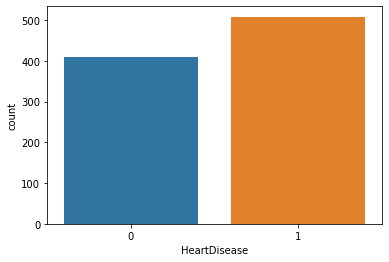

In [11]:
sns.countplot(x="HeartDisease",data=df)
plt.show()

In [12]:
print(df['Sex'].unique())
print(df['ChestPainType'].unique())
print(df['RestingECG'].unique())
print(df['ExerciseAngina'].unique())
print(df['ST_Slope'].unique())

['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']


M    725
F    193
Name: Sex, dtype: int64


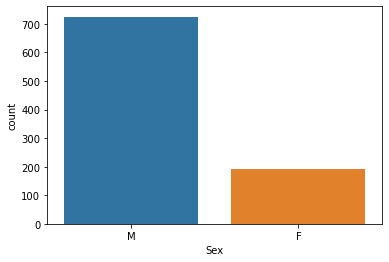

In [13]:
sns.countplot(x="Sex",data=df)
print(df['Sex'].value_counts())

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


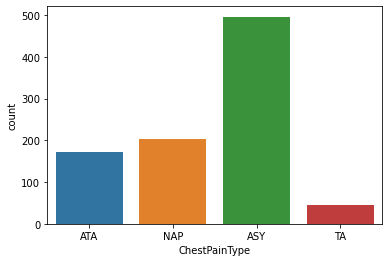

In [14]:
sns.countplot(x="ChestPainType",data=df)
print(df['ChestPainType'].value_counts())

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


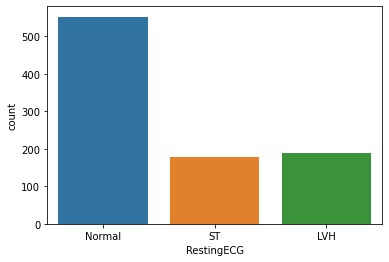

In [15]:
sns.countplot(x="RestingECG",data=df)
print(df['RestingECG'].value_counts())

N    547
Y    371
Name: ExerciseAngina, dtype: int64


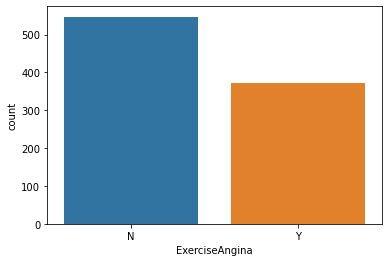

In [16]:
sns.countplot(x="ExerciseAngina",data=df)
print(df['ExerciseAngina'].value_counts())

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


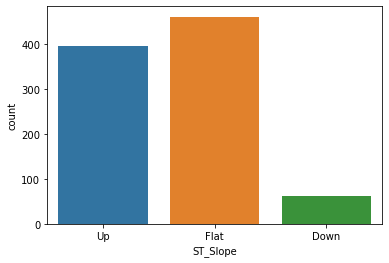

In [17]:
sns.countplot(x="ST_Slope",data=df)
print(df['ST_Slope'].value_counts())

# One hot encoding

In [18]:
df = pd.get_dummies(df, columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope' ])
print(df)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172      0.0             0   
1     49        160          180          0    156      1.0             1   
2     37        130          283          0     98      0.0             0   
3     48        138          214          0    108      1.5             1   
4     54        150          195          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132      1.2             1   
914   68        144          193          1    141      3.4             1   
915   57        130          131          0    115      1.2             1   
916   57        130          236          0    174      0.0             1   
917   38        138          175          0    173      0.0             0   

     Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  \
0        0 

# Correlation Matrix

In [19]:
corr_mat = df.corr()['HeartDisease'].sort_values()  
print(corr_mat)

ST_Slope_Up         -0.622164
ExerciseAngina_N    -0.494282
ChestPainType_ATA   -0.401924
MaxHR               -0.400421
Sex_F               -0.305445
Cholesterol         -0.232741
ChestPainType_NAP   -0.212964
RestingECG_Normal   -0.091580
ChestPainType_TA    -0.054790
RestingECG_LVH       0.010670
RestingECG_ST        0.102527
RestingBP            0.107589
ST_Slope_Down        0.122527
FastingBS            0.267291
Age                  0.282039
Sex_M                0.305445
Oldpeak              0.403951
ExerciseAngina_Y     0.494282
ChestPainType_ASY    0.516716
ST_Slope_Flat        0.554134
HeartDisease         1.000000
Name: HeartDisease, dtype: float64


<AxesSubplot:>

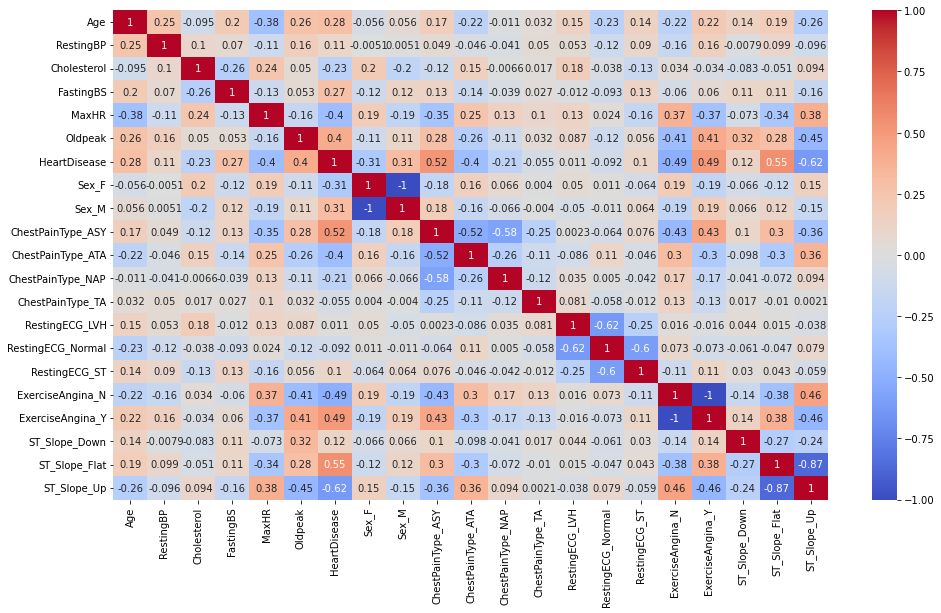

In [20]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True,cmap="coolwarm")

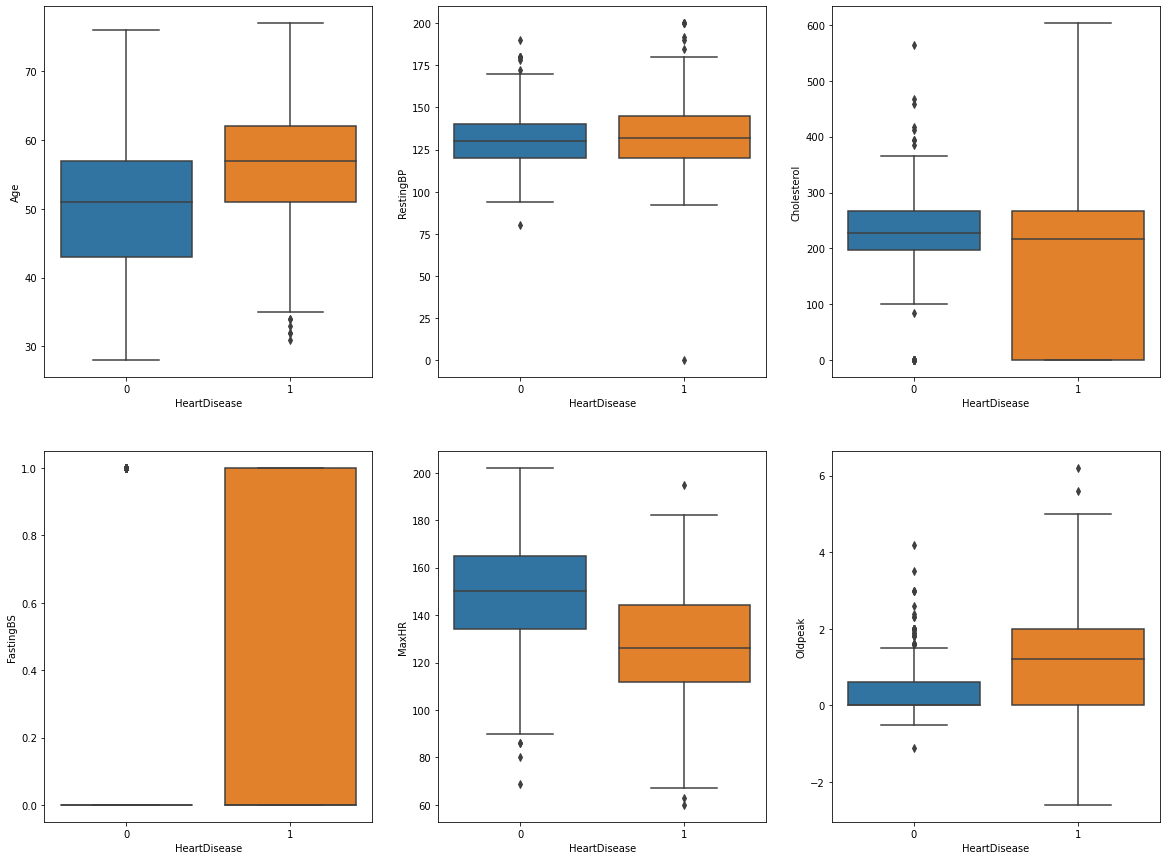

In [21]:
#checking for outliers
plt.figure(figsize=(20,15))

for i in range(6):
  plt.subplot(2,3, i+1)
  sns.boxplot(data=df, x='HeartDisease', y=df[df.columns[i]])

# Splitting Train and Test Data

In [22]:
X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease'] 

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Normalization 

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()
scaler.fit(X_train) 

StandardScaler()

In [29]:
scaler_train= scaler.transform(X_train)
scaler_test=scaler.transform(X_test)

 # Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
Lr_model = LogisticRegression()
Lr_model.fit(scaler_train,y_train)

LogisticRegression()

In [32]:
y_pred= Lr_model.predict(scaler_test)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        38
           1       0.89      0.89      0.89        54

    accuracy                           0.87        92
   macro avg       0.87      0.87      0.87        92
weighted avg       0.87      0.87      0.87        92



# SVM

In [38]:
from sklearn.svm import SVC

In [39]:
svc = SVC()
svc.fit(scaler_train, y_train)
y_pred = svc.predict(scaler_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        38
           1       0.91      0.94      0.93        54

    accuracy                           0.91        92
   macro avg       0.91      0.91      0.91        92
weighted avg       0.91      0.91      0.91        92

